In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load dataset
data = pd.read_csv('/content/sample_data/heart.csv')

In [5]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


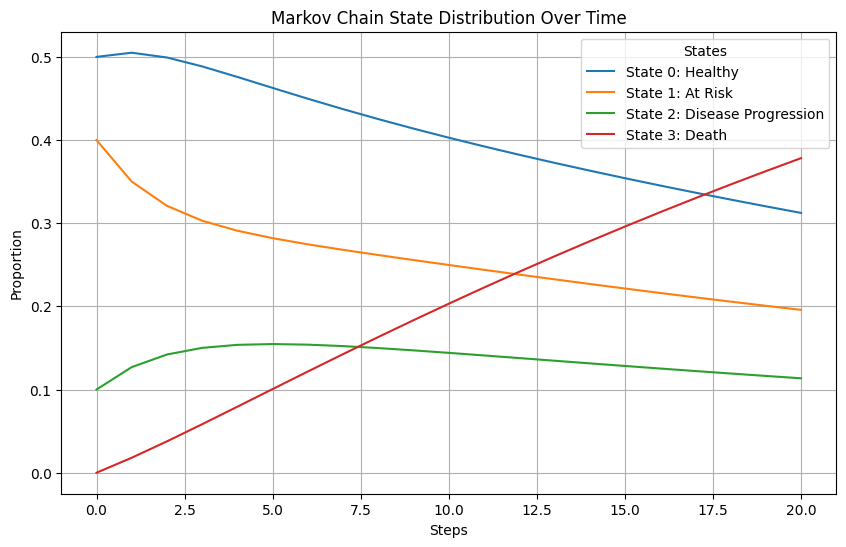

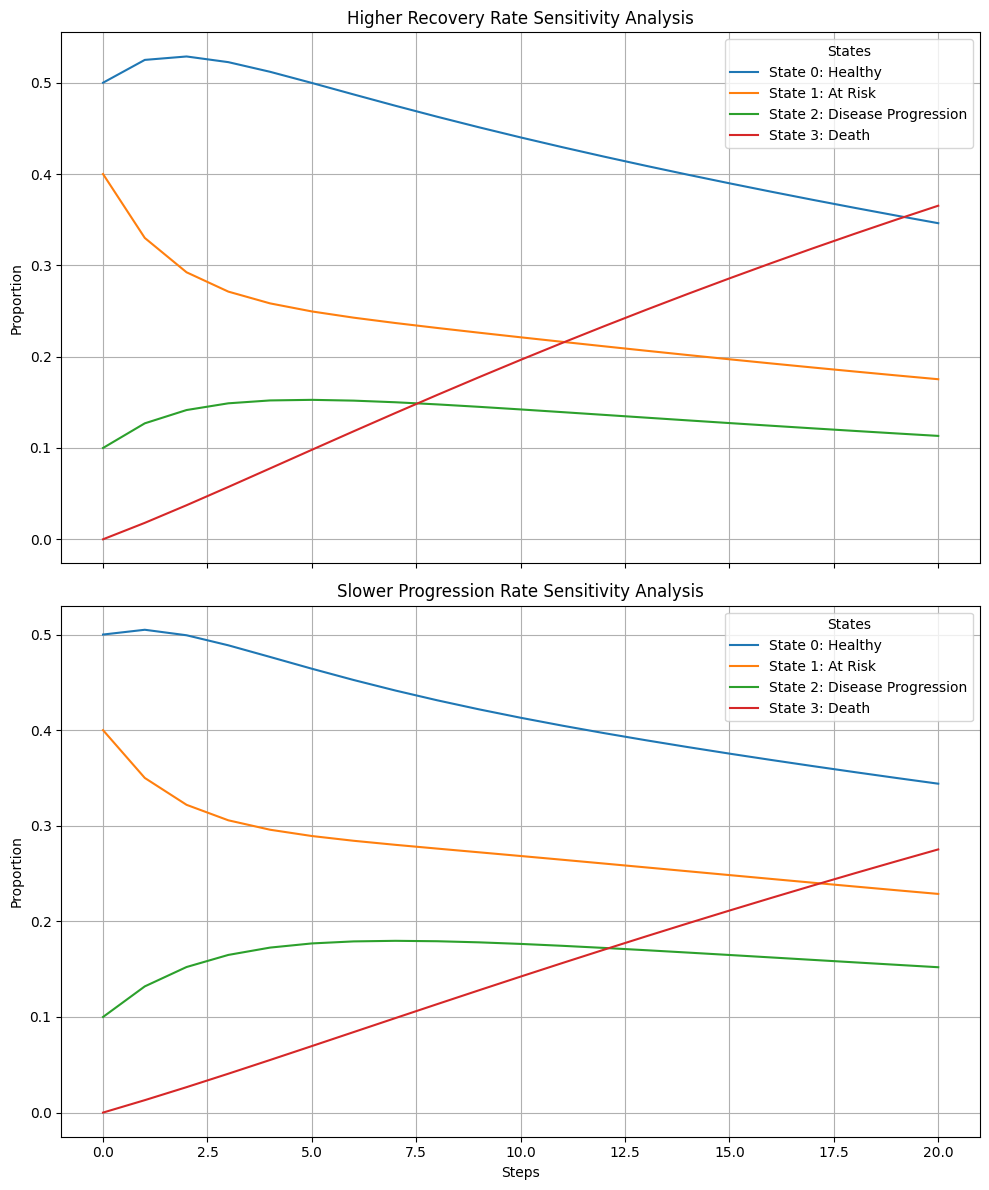

Quantitative Changes for Higher Recovery (State 1 -> State 0):
State 0    0.033761
State 1   -0.020530
State 2   -0.000316
State 3   -0.012916
Name: 20, dtype: float64

Quantitative Changes for Slower Progression (State 2 -> State 3):
State 0    0.031593
State 1    0.032892
State 2    0.038488
State 3   -0.102973
Name: 20, dtype: float64


In [6]:
# Define states based on dataset attributes
state_labels = {0: "State 0: Healthy", 1: "State 1: At Risk", 2: "State 2: Disease Progression", 3: "State 3: Death"}

# Transition matrix (baseline scenario)
transition_matrix = np.array([
    [0.85, 0.10, 0.05, 0.00],  # State 0 transitions
    [0.20, 0.70, 0.08, 0.02],  # State 1 transitions
    [0.00, 0.20, 0.70, 0.10],  # State 2 transitions
    [0.00, 0.00, 0.00, 1.00]   # State 3 (absorbing state)
])

# Initial state distribution
initial_distribution = np.array([0.5, 0.4, 0.1, 0.0])

# Function to simulate Markov chain
def simulate_markov_chain(transition_matrix, initial_distribution, steps):
    state_distribution = [initial_distribution]
    for _ in range(steps):
        new_distribution = np.dot(state_distribution[-1], transition_matrix)
        state_distribution.append(new_distribution)
    return np.array(state_distribution)

# Simulate baseline scenario
steps = 20
baseline_simulation = simulate_markov_chain(transition_matrix, initial_distribution, steps)

# Visualization of baseline simulation
plt.figure(figsize=(10, 6))
for i, label in state_labels.items():
    plt.plot(range(steps + 1), baseline_simulation[:, i], label=label)
plt.title("Markov Chain State Distribution Over Time")
plt.xlabel("Steps")
plt.ylabel("Proportion")
plt.legend(title="States")
plt.grid()
plt.savefig('/content/sample_data/baseline_distribution.png')
plt.show()

# Sensitivity Analysis: Higher Recovery (State 1 -> State 0)
higher_recovery_matrix = transition_matrix.copy()
higher_recovery_matrix[1, 0] += 0.05
higher_recovery_matrix[1, 1] -= 0.05
higher_recovery_simulation = simulate_markov_chain(higher_recovery_matrix, initial_distribution, steps)

# Sensitivity Analysis: Slower Progression (State 2 -> State 3)
slower_progression_matrix = transition_matrix.copy()
slower_progression_matrix[2, 2] += 0.05
slower_progression_matrix[2, 3] -= 0.05
slower_progression_simulation = simulate_markov_chain(slower_progression_matrix, initial_distribution, steps)

# Visualization of sensitivity analysis
fig, axes = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

# Higher Recovery Visualization
for i, label in state_labels.items():
    axes[0].plot(range(steps + 1), higher_recovery_simulation[:, i], label=label)
axes[0].set_title("Higher Recovery Rate Sensitivity Analysis")
axes[0].set_ylabel("Proportion")
axes[0].legend(title="States")
axes[0].grid()

# Slower Progression Visualization
for i, label in state_labels.items():
    axes[1].plot(range(steps + 1), slower_progression_simulation[:, i], label=label)
axes[1].set_title("Slower Progression Rate Sensitivity Analysis")
axes[1].set_xlabel("Steps")
axes[1].set_ylabel("Proportion")
axes[1].legend(title="States")
axes[1].grid()

plt.tight_layout()
plt.savefig('/content/sample_data/sensitivity_analysis.png')
plt.show()

# Quantitative Analysis
def quantitative_changes(baseline, intervention):
    changes = intervention - baseline
    return pd.DataFrame(changes, columns=[f"State {i}" for i in range(4)])

quantitative_higher_recovery = quantitative_changes(baseline_simulation, higher_recovery_simulation)
quantitative_slower_progression = quantitative_changes(baseline_simulation, slower_progression_simulation)

# Output changes at the final step (step 20)
print("Quantitative Changes for Higher Recovery (State 1 -> State 0):")
print(quantitative_higher_recovery.iloc[20])

print("\nQuantitative Changes for Slower Progression (State 2 -> State 3):")
print(quantitative_slower_progression.iloc[20])